# LDA Observ

## Packages

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from webcolors import hex_to_rgb
import networkx as nx
dpi = 300

In [2]:
import scipy 
from scipy.stats import linregress
import math

## Initial data

In [3]:
K = ['T'+ str(n) for n in list(range(1,16+1))]
code = ['JPN' , 'KOR', 'SGP', 'THA', 'MYS', 'VNM', 'IDN', 'PHL']
code2 = ['ALL'] + code 
code3 = ['ALL', 'SEA'] + code
code4 = ['SEA'] 
code5 = ['JPN' , 'KOR', 'SEA', 'SGP', 'THA', 'MYS', 'VNM', 'IDN', 'PHL']


year = '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'
nyear = 'ALL', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'
oyear = '2014', '2015', '2016', '2017', '2018', '2019', '2020'

tcode = ['T1-RNA and transcription', 'T2-Epigenetics and \n epigenomics', 'T3-Genetic disorder', 'T4-Cancer genomics', 
                'T5-Clinical genetics', 'T6-Microbial diversity', 'T7-Microbiome diet', 'T8-Population genomics', 
                'T9-Microbial community', 'T10-Translational medicine', 'T11-Disease mechanisms', 'T12-Bioinformatics and \n evolutionary genomics', 
                'T13-Metabolic pathways', 'T14-Mitochondrial and \n viral genomes', 'T15-Miscellaneous', 'T16-Infection and \n drug resistance']

tcolor = ['#AEC7E8', '#1F77B4', '#FFBB78', '#FF7F0E', 
           '#98DF8A', '#2CA02C', '#FF9896', '#D62728',
           '#C5B0D5', '#9467BD', '#C49C94', '#8C564B', 
           '#DBDB8D', '#BCBD22', '#C7C7C7', '#7F7F7F']
           
hsl_color = ['205, 71%, 41%', '214, 56%, 80%', '28, 100%, 53%', ' 30, 100%, 74%', 
             '120, 57%, 40%', '110, 57%, 71%', '0, 69%, 50%', '1, 100%, 79%',
             '271, 39%, 57%', '274, 31%, 76%', '10, 30%, 42%', '10, 29%, 68%',
             '60, 70%, 44%', '60, 52%, 71%', '0, 0%, 50%', '0, 0%, 78%']

tlist = list(range(0,16))
ddname = {tlist[i]: tcode[i] for i in range(len(tlist))}
ddcolor = {tlist[i]: tcolor[i] for i in range(len(tlist))}
ddcolor2 = {K[i]: tcolor[i] for i in range(len(tlist))}
ddk = {tlist[i]: K[i] for i in range(len(tlist))}
ddn = {K[i]: tlist[i] for i in range(len(tlist))}

dpi = 300
dpi2 = 500

In [4]:
data = pd.read_csv('fig/lda/ldaouty.csv')
data['ALL'] = True
dt = data[K]

In [5]:
#SEA index

dtemp = data[['SGP', 'MYS', 'THA', 'VNM', 'IDN', 'PHL']]
dtemp = dtemp[dtemp.any(axis=1)]
idxlist = dtemp.index.tolist()
sea_bool = [bool(True) if f in idxlist else bool(False) for f in range(0,len(data)) ]
data['SEA'] = sea_bool

In [6]:
md = data
all_idx = np.argwhere(np.array(md['ALL'])).T[0]
idn_idx = np.argwhere(np.array(md['IDN'])).T[0]
jpn_idx = np.argwhere(np.array(md['JPN'])).T[0]
kor_idx = np.argwhere(np.array(md['KOR'])).T[0]
sig_idx = np.argwhere(np.array(md['SGP'])).T[0]
phi_idx = np.argwhere(np.array(md['PHL'])).T[0]
mal_idx = np.argwhere(np.array(md['MYS'])).T[0]
tha_idx = np.argwhere(np.array(md['THA'])).T[0]
vie_idx = np.argwhere(np.array(md['VNM'])).T[0]
dd_idx = np.argwhere(np.array(md['JPN'] | md['KOR'])).T[0]
dm_idx = np.argwhere(np.array(md['SGP'] | md['THA'] | md['MYS'])).T[0]
dg_idx = np.argwhere(np.array(md['VNM'] | md['IDN'] | md['PHL'])).T[0]
sea_idx = np.argwhere(np.array(md['SGP'] | md['THA'] | md['MYS'] | md['VNM'] | md['IDN'] | md['PHL'])).T[0]

em_idx = np.argwhere(np.array(md['2014'])).T[0]
li_idx = np.argwhere(np.array(md['2015'])).T[0]
en_idx = np.argwhere(np.array(md['2016'])).T[0]
tu_idx = np.argwhere(np.array(md['2017'])).T[0]
de_idx = np.argwhere(np.array(md['2018'])).T[0]
se_idx = np.argwhere(np.array(md['2019'])).T[0]
du_idx = np.argwhere(np.array(md['2020'])).T[0]
sa_idx = np.argwhere(np.array(md['2021'])).T[0]

idx = [jpn_idx, kor_idx, sig_idx, tha_idx, mal_idx, vie_idx, idn_idx, phi_idx]
idx2 = [all_idx], idx
idx3 = [all_idx, sea_idx], idx
idx4 = [sea_idx], idx
idx5 = [jpn_idx, kor_idx, sea_idx, sig_idx, tha_idx, mal_idx, vie_idx, idn_idx, phi_idx]

## Prepare data

In [7]:
#Get yearly data

dt_df = dt[K]
dt_df['Year'] = data['Year'].tolist()
tpl = {}
for t in K :
    dd = dt_df[[t, 'Year']]
    dd.columns = [t, 'Year']
    yl = []
    for y in year:
        pop = dd.loc[dd['Year'] == int(y), t].sum()
        yl.append(pop)
    tpl[t] = yl

### Visual time series all

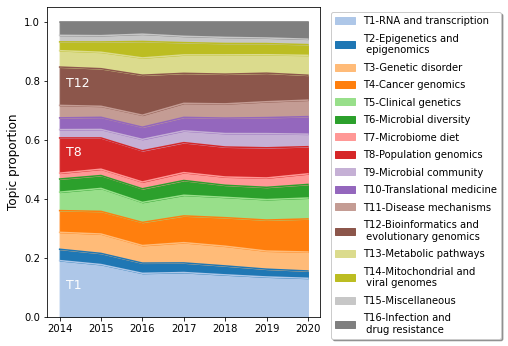

In [10]:
sns.reset_orig()
#sns.set_theme(color_codes=True)

dtplist = [tpl[f] for f in K]
dtp = pd.DataFrame(dtplist, columns = year)
dtp = dtp.drop(columns = '2021')

#dtp.columns = ['2014', '2015', '2016', '2017' ,'2018', '2019', '2020', '2021*']
dtp = dtp.transpose()
#dtp.columns = tcode
dtp.columns = K
dtpn = dtp.div(dtp.sum(axis=1), axis=0)

ptg = [f/sum(dtp.sum().tolist()) for f in dtp.sum().tolist()]
ddptg = {ptg[i]: K[i] for i in range(len(K))}
ddptgk = {ptg[i]: tlist[i] for i in range(len(K))}

t_dom = [ddptg[f] for f in ptg if  (f >= 0.1)]
u_dom = [ddptgk[f] for f in ptg if  (f >= 0.1)]
i_dom = dtpn.loc['2014'].tolist()
ir_dom = np.cumsum(i_dom).tolist()
y_dom = [(ir_dom[f] - i_dom[f]/2)  for f in u_dom]

dtpn.columns = tcode

ax = dtpn.plot.area(stacked=True, color=tcolor, legend='reverse', figsize = (8 , 5.25))
#plt.legend(loc='upper center', bbox_to_anchor=(1.3,1), shadow=True, ncol=1)

plt.ylabel('Topic proportion', size = 12)
plt.legend(loc='upper center', bbox_to_anchor=(1.35,1), shadow=True, ncol=1, labelspacing = 0.75)

for n in range(0, len(t_dom)):
    plt.annotate(t_dom[n], xy=(0,0), xytext=(0.15, y_dom[n]), color = 'white', size = 12.5)

plt.tight_layout()
plt.savefig('fig/lda_n/ts_all.png', dpi=dpi)

### Visual topic trend

In [12]:
#determine trends (positive or negative) with linear regression

dtpn.columns = K
dtpnt = dtpn.transpose()
dtpnp = dtpnt.transpose()

import scipy 
from scipy.stats import linregress
import math

linrv_sco = []
linpv_sco = []
for c in K: 
    x = np.array(list(range(1,8)))
    y = dtpnp[c].head(7).tolist()
    _, _, r, p, _ = linregress(x, y)
    linrv_sco.append(r)
    linpv_sco.append(p)

linrv_sco = [round(f, 3) for f in linrv_sco]
linpv_sco = [round(f, 3) for f in linpv_sco]

dtpnt['linrv_sco'] = linrv_sco
dtpnt['linpv_sco'] = linpv_sco

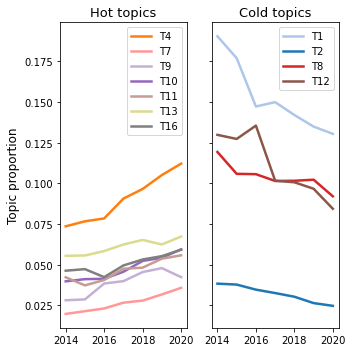

In [13]:
#Create plot hot topic

#dtpnt['color'] = color
dtpntp = dtpnt[(dtpnt['linpv_sco'] < 0.05) & (dtpnt['linrv_sco'] > 0)].drop(columns= ['linrv_sco', 'linpv_sco']).transpose()
dtpntn = dtpnt[(dtpnt['linpv_sco'] < 0.05) & (dtpnt['linrv_sco'] < 0)].drop(columns= ['linrv_sco', 'linpv_sco']).transpose()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(5,5))

pcolor = [ddcolor2[b] for b in list(dtpntp.columns)]
dtpntp.plot(ax=ax1, linewidth=2.5, color = pcolor)
ax1.set_title('Hot topics', size =13)
ax1.set_ylabel('Topic proportion', size =12)

ncolor = [ddcolor2[b] for b in list(dtpntn.columns)]
dtpntn.plot(ax=ax2, linewidth=2.5, color = ncolor)
ax2.set_title('Cold topics', size =13)

#sns.reset_orig()
plt.tight_layout()
#plt.savefig('fig/lda_n/trend_all.png', dpi=dpi)

In [16]:
# Get list of 3 top hot and cold topic
ldtpntp = dtpnt[(dtpnt['linpv_sco'] < 0.05) & (dtpnt['linrv_sco'] > 0)]
ldtpntn = dtpnt[(dtpnt['linpv_sco'] < 0.05) & (dtpnt['linrv_sco'] < 0)]


In [17]:
topic_pos = ldtpntp.sort_values(by = 'linrv_sco', ascending = False).head(5).index.tolist()
topic_neg = ldtpntn.sort_values(by = 'linrv_sco').head(5).index.tolist()

topic_top3 = [topic_neg + topic_pos]
topic_pos

['T7', 'T4', 'T10', 'T13', 'T11']

## Count topic proportion per country

In [18]:
tplist = []
for i in idx5 :
    dfcp = dt.loc[i, :]
    dfcpl = dfcp.sum().tolist()
    dfcpln = [float(i)/sum(dfcpl) for i in dfcpl]
    tplist.append(dfcpln)

dftp = pd.DataFrame(tplist)
dftp.columns = K
dftp.columns = K
dftp['code'] = code5
dftp = dftp.set_index('code')
dftpt = dftp.T

In [19]:
#dftp.plot.bar(stacked=True, color=tcolor)
ht_inp

,JPN,KOR,SEA,SGP,THA,MYS,VNM,IDN,PHL
T1-RNA and transcription,0.153088,0.129805,0.133938,0.189346,0.098475,0.101871,0.094981,0.080781,0.108054
T2-Epigenetics and \n gene expression,0.034846,0.025593,0.023497,0.038789,0.014656,0.014070,0.010111,0.012906,0.017073
T3-Genetic disorder,0.083102,0.046586,0.044732,0.043805,0.059465,0.032949,0.047394,0.034003,0.024825
T4-Cancer genomics,0.111288,0.104373,0.059455,0.099057,0.037694,0.035481,0.039369,0.032141,0.020634
T5-Clinical genetics,0.075511,0.064822,0.065000,0.074299,0.065697,0.050220,0.078880,0.047815,0.050130
T6-Microbial diversity,0.032835,0.067627,0.039600,0.017350,0.047511,0.063479,0.045206,0.050045,0.033721
T7-Microbiome diet,0.029614,0.030256,0.027276,0.028071,0.027930,0.025210,0.027930,0.027241,0.018351
T8-Population genomics,0.088762,0.102194,0.129809,0.096413,0.139652,0.141639,0.157022,0.169835,0.236049
T9-Microbial community,0.037498,0.041487,0.054686,0.036685,0.059093,0.074121,0.056655,0.064383,0.053794
T10-Translational medicine,0.056499,0.048179,0.044114,0.060620,0.038819,0.032167,0.031852,0.025510,0.028014


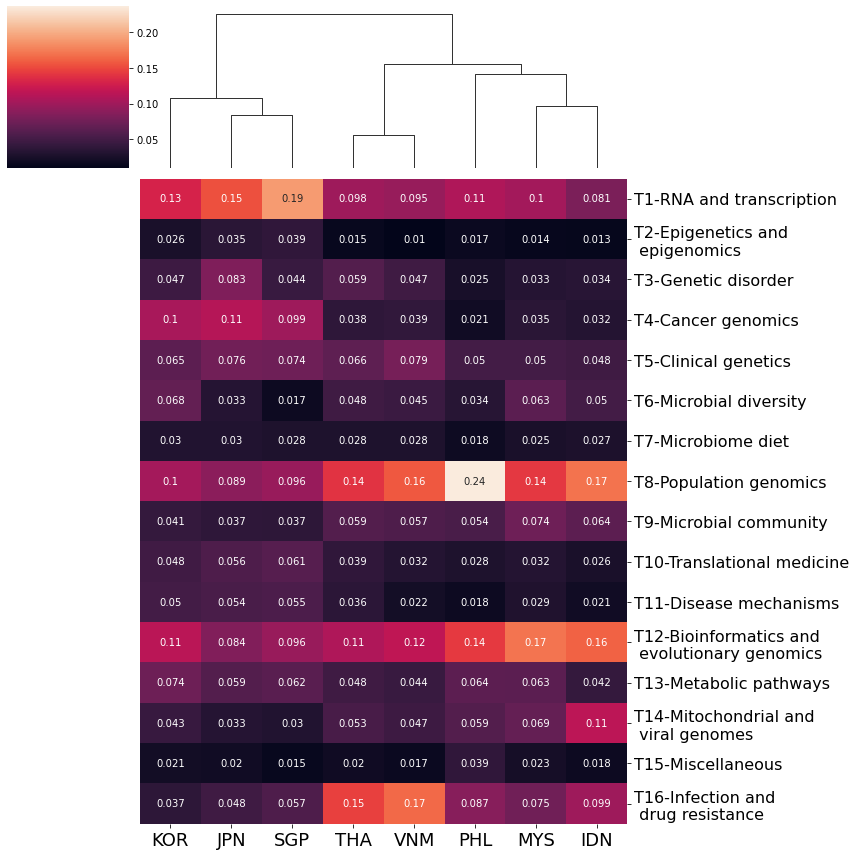

In [19]:
ht_inp = dftpt
ht_inp.index = tcode
ht_inp.columns.name = None
ht_inp = ht_inp.drop(columns = 'SEA')


g = sns.clustermap(ht_inp, row_cluster=False, figsize=(12,12), annot=True, cmap = 'rocket', 
                  tree_kws=dict(linewidths=1))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, size = 16)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0, size = 18)
plt.tight_layout()
#plt.savefig('fig/lda_n/hm_propt.png', dpi=dpi)

## Disseminate data per country

In [20]:
# prepare data

clist = {}

for c,i in zip(code5, idx5): 
    dcdf = dt[K]
    dcdf['Year'] = data['Year'].tolist()
    dcdfc = dcdf.loc[i, :]
    
    tpl = {}
    for t in K :
        dd = dcdfc[[t, 'Year']]
        dd.columns = [t, 'Year']
        yl = []
        for y in year:
            pop = dd.loc[dd['Year'] == int(y), t].sum()
            yl.append(pop)
            tpl[t] = yl
    

    dtplist = [tpl[f] for f in K]
    dtp = pd.DataFrame(dtplist, columns = year).drop(columns = '2021')  
#    dtp.columns = ['2014', '2015', '2016', '2017' ,'2018', '2019', '2020', '2021*']
    dtp = dtp.transpose()
    dtp.columns = K
    clist[c] = dtp.div(dtp.sum(axis=1), axis=0)    

### Visual topic proportion

In [22]:
u_dom

[0, 3]

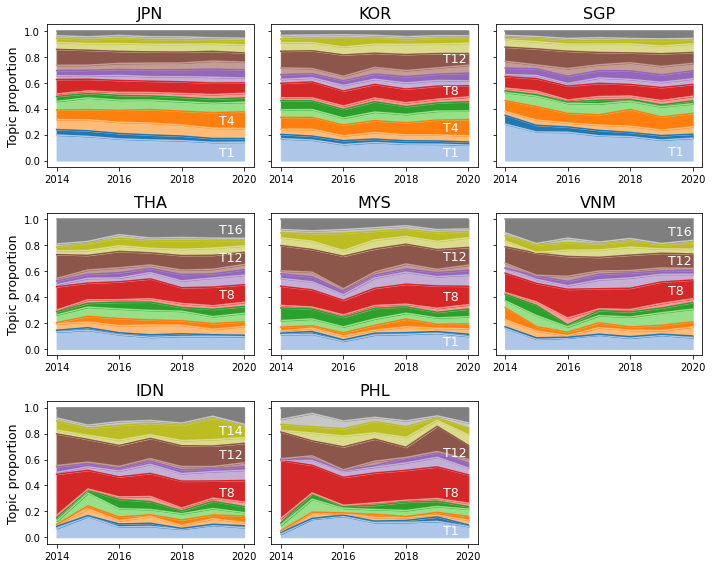

In [33]:
#Topic proportion

fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (10,8), sharey = True)

sns.reset_orig()
rows, row = 3, 0
cols, col = 3, 0
for c in code: 
    ptg = dftpt[c].tolist()
    ddptg = {ptg[i]: K[i] for i in range(len(K))}
    ddptgk = {ptg[i]: tlist[i] for i in range(len(K))}

    t_dom = [ddptg[f] for f in ptg if  (f >= 0.1)]
    u_dom = [ddptgk[f] for f in ptg if  (f >= 0.1)]
    i_dom = clist[c].loc['2020'].tolist()
    ir_dom = np.cumsum(i_dom).tolist()
    y_dom = [(ir_dom[f] - i_dom[f]/1.35)  for f in u_dom]
    
    clist[c].plot.area(ax = ax[col][row], stacked=True, color=tcolor, legend=None)
    ax[col][row].set_ylabel('Topic proportion', size = 12.5)
    ax[col][row].set_title(c, size = 16)
    plt.tight_layout()
    for n in range(0, len(t_dom)):
        ax[col][row].annotate(t_dom[n], xy=(0,0), xytext=(5.2, y_dom[n]), color = 'white', size = 12.5)
    row = row+1
    if row == rows:
        row = 0
        col = col+1
        
ax[2,2].set_axis_off()        
plt.tight_layout()
plt.savefig('fig/lda_n/ts_country_nosea.png', dpi=dpi)
plt.show()

### Visual trend

In [41]:
n=clist['IDN']
n

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16
2014,0.067838,0.016603,0.013512,0.001772,0.024231,0.027181,0.016910,0.318452,0.013997,0.043827,0.008963,0.244727,0.028801,0.071863,0.022405,0.078917
2015,0.159418,0.008169,0.052749,0.022978,0.097516,0.022617,0.008844,0.144607,0.026839,0.023140,0.013227,0.175369,0.031466,0.055256,0.022880,0.134926
2016,0.080167,0.022799,0.025113,0.028336,0.064792,0.070784,0.019547,0.154836,0.045250,0.019248,0.016199,0.161118,0.042100,0.113646,0.028575,0.107492
2017,0.084280,0.024145,0.050970,0.014625,0.040641,0.060620,0.039420,0.178023,0.069961,0.025392,0.018236,0.156855,0.028312,0.088104,0.022241,0.098175
2018,0.062291,0.006976,0.022309,0.042299,0.047741,0.022550,0.021640,0.207513,0.058236,0.028667,0.025777,0.160626,0.039217,0.119691,0.015662,0.118805
2019,0.092651,0.007935,0.043165,0.029053,0.048803,0.057021,0.023022,0.132903,0.071919,0.023163,0.016285,0.158277,0.049251,0.163879,0.016593,0.066081
2020,0.074564,0.014287,0.023766,0.051641,0.026537,0.046300,0.035316,0.166045,0.078652,0.027871,0.030004,0.149783,0.044788,0.088427,0.014366,0.127653


In [42]:
#determine trends (positive or negative) with linear regression

def get_trend( f = ''):
    n=clist[f]
    n.columns = K
    
    linrv_sco = []
    linpv_sco = []
    for c in K:
        x = np.array(list(range(1,8)))
        y = n[c].head(7).tolist()
        _, _, r, p, _ = linregress(x, y)
        linrv_sco.append(r)
        linpv_sco.append(p)
        #linrv_sco = [round(f, 3) for f in linrv_sco]
        #linpv_sco = [round(f, 3) for f in linpv_sco]
    n = n.transpose()
    n['linrv_sco'] = linrv_sco
    n['linpv_sco'] = linpv_sco
    n['Trend'] = ['Hot' if ((rv > 0) & (pv < 0.05)) else 'Cold' if ((rv < 0) & (pv < 0.05)) else 'Flat' for rv,pv in zip(n['linrv_sco'], n['linpv_sco'])]
        
    do = pd.DataFrame({'Proportion' : dftpt[f].tolist(), 
              'Dominant_topic' : ['Yes' if f > 0.1 else 'No' for f in dftpt[f].tolist()],
              'Trend' : n['Trend'].tolist(), 'Coefficient' : linrv_sco})
    do.index = K
    return do

<function matplotlib.pyplot.show(close=None, block=None)>

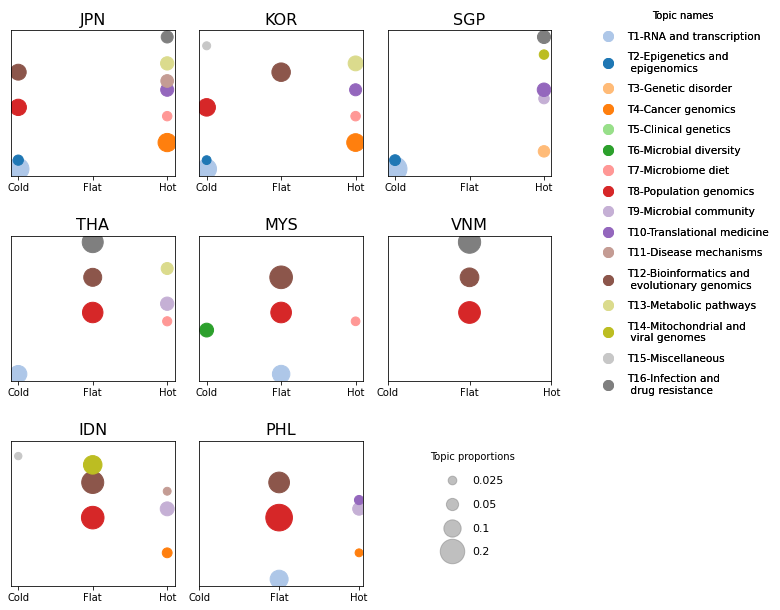

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (8,8.5), sharey = True)

sns.reset_orig()
rows, row = 3, 0
cols, col = 3, 0
for c in code: 
    do = get_trend(c)
    doo = do[~((do.Trend == 'Flat') & (do.Dominant_topic == 'No'))]
    dft = pd.DataFrame({
        'Y': [ddn[f] for f in doo.index.tolist()],
        'X': [1 if f == 'Hot' else 0 if f == 'Flat' else -1 for f in doo['Trend'].tolist()],
        'Colors': [ddcolor2[f] for f in list(doo.index)],
        "bubble_size" : [(f * 3000) for f in doo['Proportion'].tolist()]})
    scatter = ax[col][row].scatter('X', 'Y',
             s='bubble_size',
             c='Colors',
             data=dft)
    ax[col][row].set_xticks([-1,0,1]) 
    ax[col][row].set_xticklabels(['Cold', 'Flat', 'Hot'])
    ax[col][row].set_yticks([]) 
    ax[col][row].set_title(c, size = 16)
    ax[col][row].grid(False)
    row = row+1
    if row == rows:
        row = 0
        col = col+1

lines = []
for i,w in zip(K, tcolor):
    lines.append(Line2D([],[], label = w, color=w, markersize = 10, marker = 'o', lw=0))

legend1 = fig.legend(lines, tcode, loc = 'upper right', bbox_to_anchor=(1.36, 1),labelspacing = 1,
                    frameon=False, title = 'Topic names', fontsize = 10.5)
fig.add_artist(legend1)

nvalue = [0.025,0.05, 0.1, 0.2]
nsize = [75, 150, 300, 600]

lines2 = []
for i,w in zip(nvalue, nsize):
    lines2.append(Line2D([],[], label = int(i), markersize=np.sqrt(w), 
                         color='grey', marker = 'o', lw=0, alpha = 0.5))

#sea_bbox = (1.3,0.28)
ax[2,2].set_axis_off()
nosea_bbox = (0.92, 0.28)
legend2 = fig.legend(lines2, nvalue, loc = 'upper right', bbox_to_anchor= nosea_bbox, labelspacing = 1.25,
                    frameon=False, title = 'Topic proportions', fontsize = 11)
    
plt.tight_layout(h_pad = 2.5) 
plt.savefig('fig/lda_n/bub_trend_nosea.png', dpi=dpi, bbox_inches='tight')
plt.show

### Create tabel for topic summary

In [ ]:
topic_info = []
for f in code4:
    l = get_trend(f)
    ld = l[l['Dominant_topic'] == 'Yes']
    dd = ld.index.tolist()
    lh = l[l['Trend'] == 'Hot']
    dh = lh.index.tolist()
    lc = l[l['Trend'] == 'Cold']
    dc = lc.index.tolist()
    k = [f, dd, dh, dc]
    topic_info.append(k)

columns = 'Country', 'Dominant_topic', 'Hot topic', 'Cold topic'
topic_info = pd.DataFrame(topic_info, columns = columns)
#topic_info.to_excel('fig/lda_n/topic_info.xlsx', index=False)

In [ ]:
l = get_trend('IDN')
ld = l[l['Dominant_topic'] == 'Yes']
dt = ld.index.tolist()
lh = l[l['Trend'] == 'Hot']
dh = lh.index.tolist()
lc = l[l['Trend'] == 'Cold']
dc = lc.index.tolist()
k = ['IDN', dt, dh, dc]
k

### Create tabel title for max value 

In [ ]:
#mdp = pd.read_csv('mt_country/call_tpf.csv')

dmax = dt[K]

header_list = ['Title', 'PMID', 'Abstract'] + list(code)
header = ['Title', 'PMID', 'Abstract']
for h in header_list: 
    dmax[h] = mdp[h].tolist()

In [ ]:
ddtit = {}
for f in K: 
    dfh = [f] + header_list
    dtit = dmax.sort_values(by = f, ascending =False).head(5)[[f, 'Title', 'PMID']]
    dtit['Topic'] = f 
    dtit.columns = ['Values', 'Article title', 'PMID', 'Topic']
    dtif = dtit[['Topic', 'Values', 'Article title', 'PMID']]
    ddtit[f] = dtif
    
dtif = pd.concat(([ddtit[f] for f in K]), axis =0)
#dtif.to_excel('fig/lda_n/ttitlemax5.xlsx', index=False)

In [ ]:
ddtit = {}
for f in K: 
    dfh = [f] + header_list
    dtit = dmax.sort_values(by = f, ascending =False).head(5)[dfh]
    dtit['Topic'] = f 
    dtit.columns = ['Values'] + header_list + ['Topic'] 
    dtif = dtit[['Topic', 'Values'] + header_list]
    ddtit[f] = dtif
    
dtif = pd.concat(([ddtit[f] for f in K]), axis =0)
dtif = dtif.where(dtif != True, dtif.columns.to_series(), axis=1)
dtif[dtif == False ] = np.nan
#dtif.to_excel('fig/lda_n/ttitlemax5.xlsx', index=False)

In [ ]:
dtif

In [ ]:
dtif